In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\Aniket\Documents\Jupyter Notebook\Datasets\bmi.csv")

In [3]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [4]:
data.tail()

,Gender,Height,Weight,Index
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5
499,Male,173,131,5


In [6]:
data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [9]:
data.columns

Index(['Gender', 'Height', 'Weight', 'Index'], dtype='object')

In [10]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [11]:
gender = LabelEncoder()
data['Gender'] = gender.fit_transform(data['Gender'])

In [12]:
data.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [13]:
bins = (-1,0,1,2,3,4,5)
health = ['Malnourished', 'Underweight', 'Fit', 'Slightly Overweight', 'Overweight', 'Extremely Overweight']
data['Index'] = pd.cut(data['Index'],bins, labels = health)

In [15]:
data['Index']

0                Overweight
1                       Fit
2                Overweight
3       Slightly Overweight
4       Slightly Overweight
5       Slightly Overweight
6      Extremely Overweight
7      Extremely Overweight
8       Slightly Overweight
9                Overweight
10                      Fit
11               Overweight
12      Slightly Overweight
13                      Fit
14                      Fit
15     Extremely Overweight
16     Extremely Overweight
17     Extremely Overweight
18     Extremely Overweight
19     Extremely Overweight
20     Extremely Overweight
21     Extremely Overweight
22               Overweight
23     Extremely Overweight
24                      Fit
25      Slightly Overweight
26      Slightly Overweight
27              Underweight
28     Extremely Overweight
29     Extremely Overweight
               ...         
470    Extremely Overweight
471    Extremely Overweight
472                     Fit
473    Extremely Overweight
474     Slightly Ove

In [16]:
data['Index'].value_counts()

Extremely Overweight    198
Overweight              130
Fit                      69
Slightly Overweight      68
Underweight              22
Malnourished             13
Name: Index, dtype: int64

In [17]:
data['Gender'].value_counts()

0    255
1    245
Name: Gender, dtype: int64

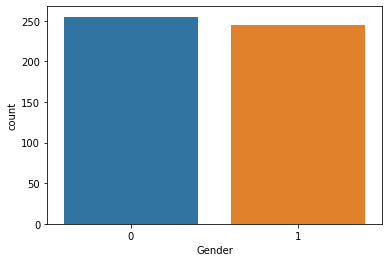

In [18]:
sns.countplot(data['Gender'])

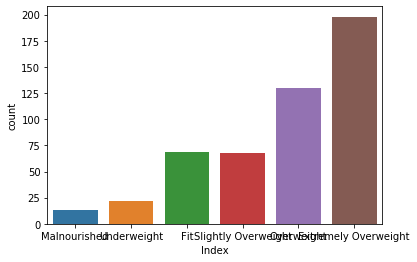

In [19]:
sns.countplot(data['Index'])

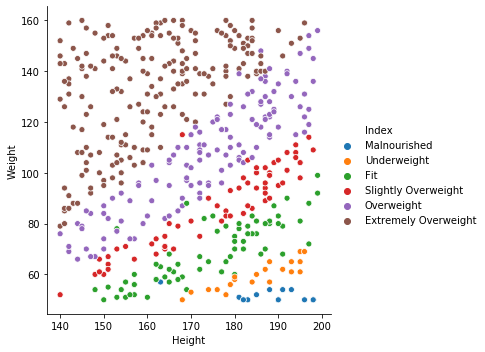

In [20]:
sns.relplot(x='Height', y='Weight', hue='Index', data=data)

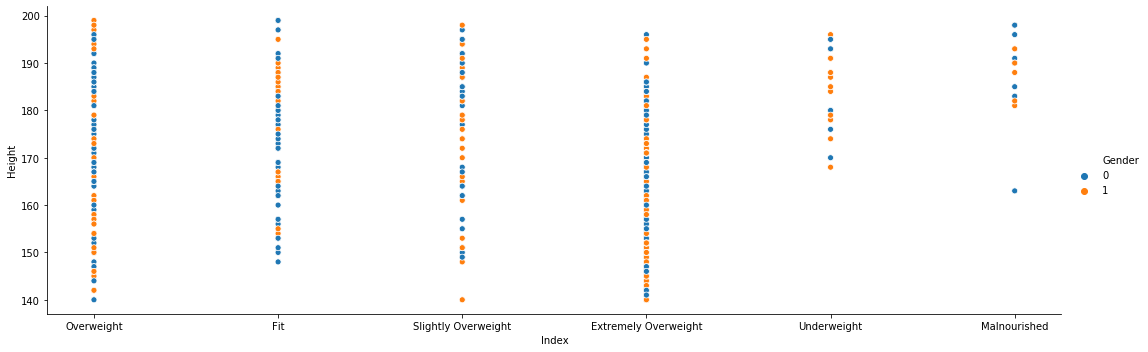

In [21]:
sns.relplot(x='Index', y='Height', hue='Gender', data=data, height = 5, aspect = 3)

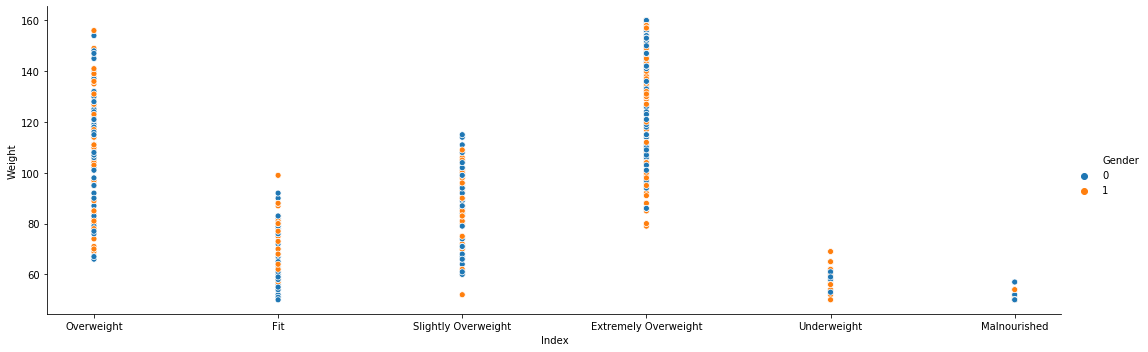

In [22]:
sns.relplot(x='Index', y='Weight', hue='Gender', data=data, height = 5, aspect = 3)

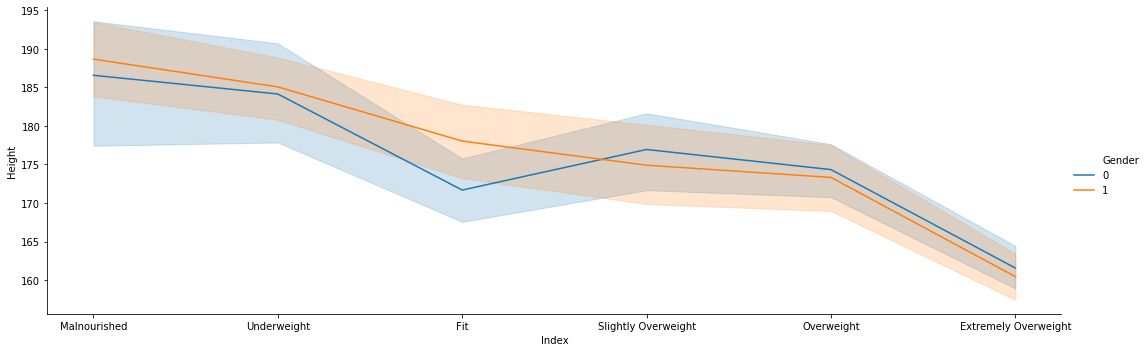

In [23]:
sns.relplot(x='Index', y='Height', hue='Gender', kind = 'line', data=data, height = 5, aspect = 3)

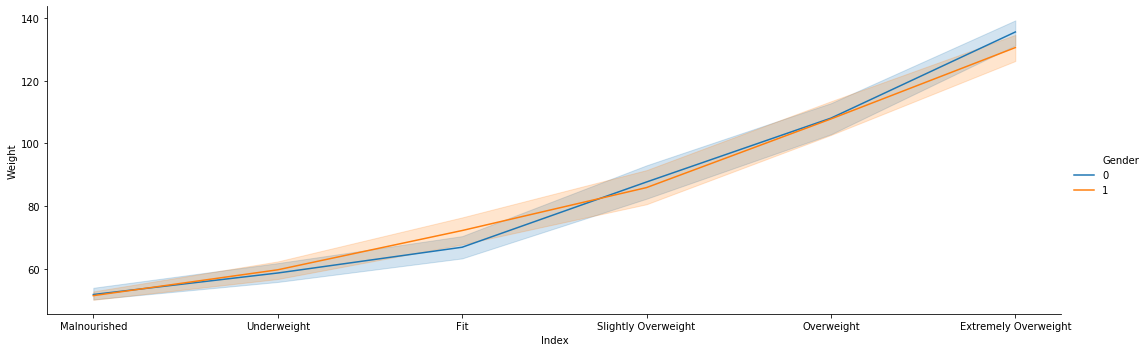

In [24]:
sns.relplot(x='Index', y='Weight', hue='Gender', kind = 'line', data=data, height = 5, aspect = 3)

In [26]:
X = data.drop('Index', axis = 1)
y = data['Index']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [29]:
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [30]:
clf = svm.SVC()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [31]:
print(classification_report(y_test,pred))

                      precision    recall  f1-score   support

Extremely Overweight       0.88      0.97      0.92        36
                 Fit       0.73      0.80      0.76        10
        Malnourished       0.00      0.00      0.00         3
          Overweight       0.96      0.78      0.86        32
 Slightly Overweight       0.78      0.93      0.85        15
         Underweight       0.60      0.75      0.67         4

            accuracy                           0.85       100
           macro avg       0.66      0.71      0.68       100
        weighted avg       0.84      0.85      0.84       100



C:\Users\Aniket\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [32]:
print(confusion_matrix(y_test, pred))

[[35  0  0  1  0  0]
 [ 0  8  0  0  2  0]
 [ 0  1  0  0  0  2]
 [ 5  0  0 25  2  0]
 [ 0  1  0  0 14  0]
 [ 0  1  0  0  0  3]]


In [34]:
print(accuracy_score(y_test, pred))

0.85


In [35]:
a = [[0,160,48]]
a = s.transform(a)
b = clf.predict(a)

In [36]:
b

array(['Fit'], dtype=object)

In [37]:
data

,Gender,Height,Weight,Index
0,1,174,96,Overweight
1,1,189,87,Fit
2,0,185,110,Overweight
3,0,195,104,Slightly Overweight
4,1,149,61,Slightly Overweight
5,1,189,104,Slightly Overweight
6,1,147,92,Extremely Overweight
7,1,154,111,Extremely Overweight
8,1,174,90,Slightly Overweight
9,0,169,103,Overweight
